# Контрольная работа №4   
#### выполнил Дьяков Андрей ПМ22-4       

## 1    
## Тема: Моделирование стоимости подержанных автомобилей
### Бизнес-задача: Предсказание цены подержанных автомобилей и определение, была ли реальная цена продажи завышенной или заниженной.   

### Задача машинного обучения: Регрессия для предсказания цены.

### Ссылка на дата-сет: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data   

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#!pip install numpy==1.21.5
# pd.options.display.max_rows = 10

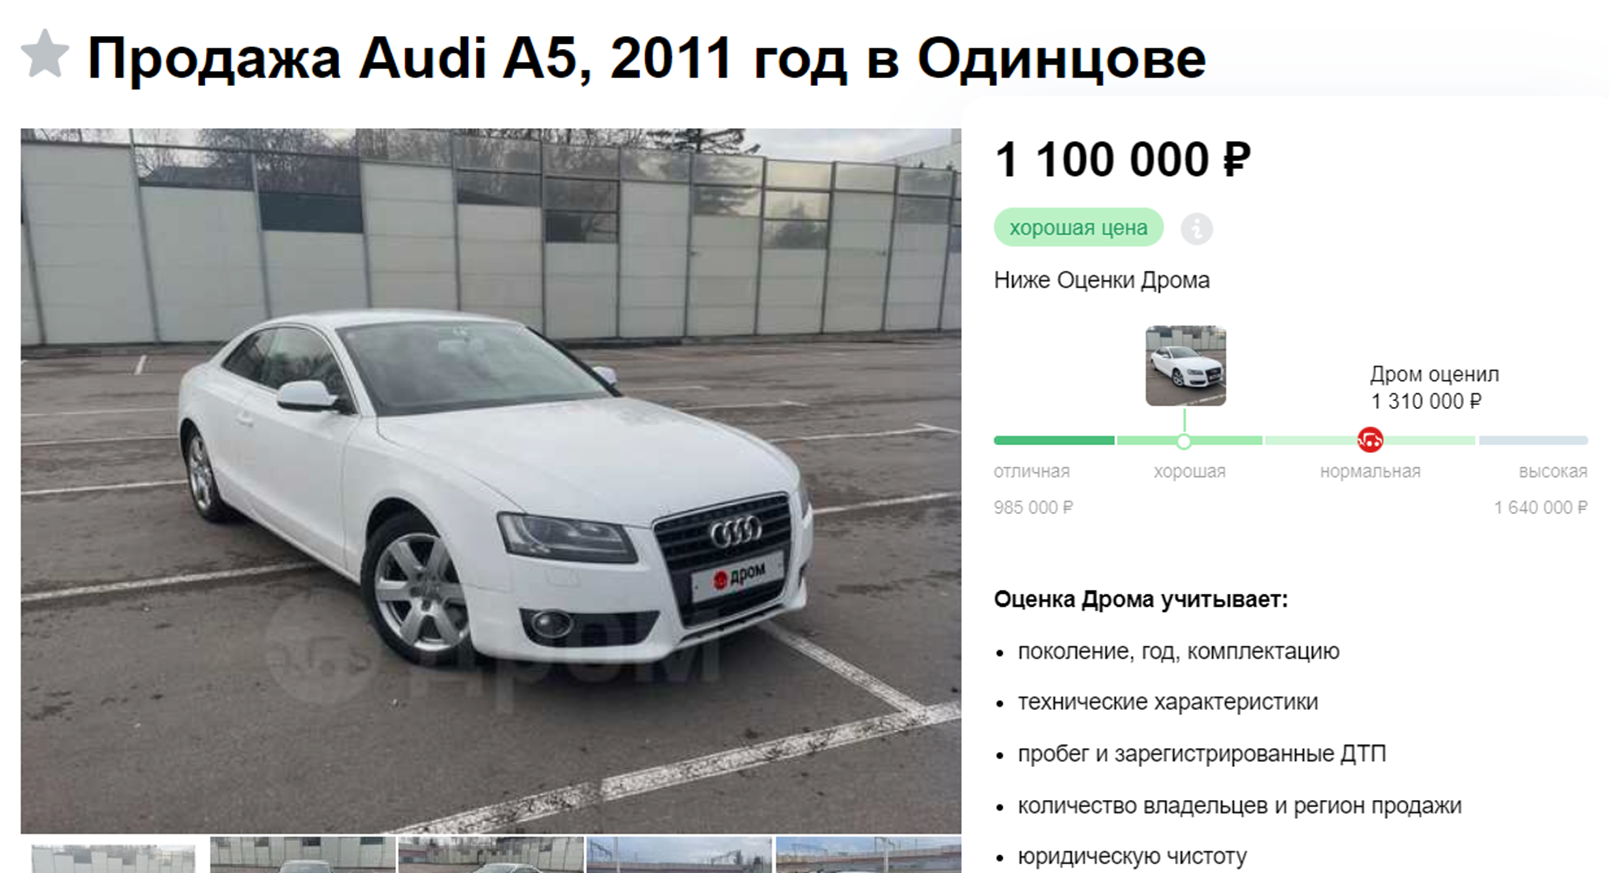

## 2 Анализ и обработка дата-сета

In [3]:
df = pd.read_csv('craigslistVehicles.csv')
df.shape

(525839, 22)

In [4]:
df.isnull().sum()

url                  0
city                 0
city_url             0
price                0
year              1440
manufacturer     24579
make              8638
condition       245958
cylinders       210400
fuel              4295
odometer         98591
title_status      2825
transmission      4267
VIN             220189
drive           151364
size            351320
type            148933
paint_color     171533
image_url            8
desc                24
lat              12221
long             12221
dtype: int64

Удаляем неинформативные для нас столбцы

In [41]:
drop_columns = ['url', 'city', 'city_url', 'make', 'title_status', 
                'VIN', 'image_url', 'desc', 'lat','long']
df_drop = df.drop(columns = drop_columns)
df_drop.head(3)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,1500,2006.0,cadillac,good,6 cylinders,gas,236000.0,automatic,rwd,mid-size,coupe,blue
1,8900,2009.0,lincoln,NaN,NaN,gas,119000.0,automatic,NaN,NaN,NaN,NaN
2,7995,2010.0,cadillac,NaN,NaN,gas,129105.0,automatic,NaN,NaN,NaN,NaN


Price, цена автомобиля (зависимая 	переменная)   
Year, год производства автомобиля   
Manufacturer, фирма производитель   
Condition, состояние автомобиля   
Cylinders, количество цилиндров   
Fuel, тип топлива   
Odometer, пробег   
Transmission, тип трансмиссии   
Drive, привод автомобиля   
Type, тип кузова    
size, размер   
paint color, цвет покраски  

In [42]:
df_drop.describe(include=['O'])

,manufacturer,condition,cylinders,fuel,transmission,drive,size,type,paint_color
count,501260,279881,315439,521544,521572,374475,174519,376906,354306
unique,41,6,8,5,3,3,4,13,12
top,ford,excellent,6 cylinders,gas,automatic,4wd,full-size,SUV,white
freq,94317,139567,112931,457726,470282,174108,93548,95890,90501


In [43]:
df_drop.describe()

,price,year,odometer
count,5.258390e+05,524399.000000,4.272480e+05
mean,6.196605e+04,2009.375184,1.011502e+05
std,9.949704e+06,8.975889,1.055252e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,3.900000e+03,2006.000000,4.900975e+04
50%,8.999000e+03,2011.000000,9.424000e+04
75%,1.790000e+04,2015.000000,1.380000e+05
max,3.048344e+09,2020.000000,1.000000e+07


In [44]:
print(df_drop.shape)
df_drop = df_drop.dropna()
print(df_drop.shape)
df_drop.head(3)

(525839, 12)
(110408, 12)


,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,1500,2006.0,cadillac,good,6 cylinders,gas,236000.0,automatic,rwd,mid-size,coupe,blue
7,7995,2007.0,lexus,excellent,6 cylinders,gas,146111.0,automatic,fwd,compact,sedan,white
8,4995,2011.0,hyundai,excellent,4 cylinders,gas,115048.0,automatic,fwd,compact,sedan,blue


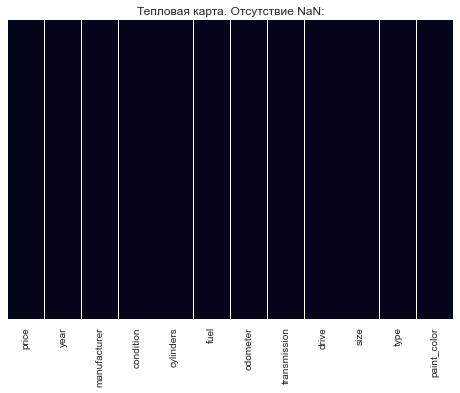

In [45]:
plt.title('Тепловая карта. Отсутствие NaN:')
sns.heatmap(df_drop.isnull(), yticklabels=False, cbar=False);

In [46]:
df_drop['price']

0          1500
7          7995
8          4995
9         12995
12         8000
          ...  
525826     1795
525829     3850
525832     7000
525835     6500
525836     3000
Name: price, Length: 110408, dtype: int64

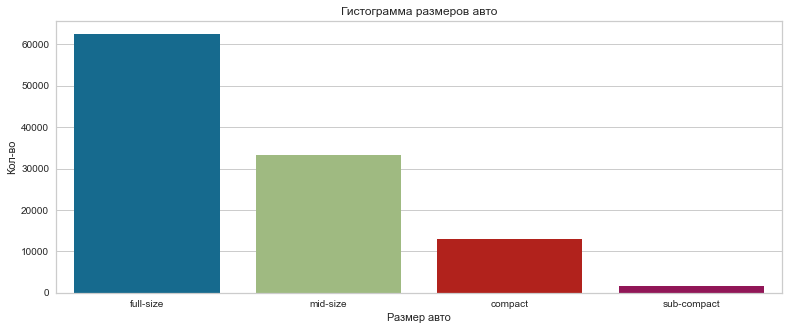

In [47]:
plt.figure(figsize=(13, 5))
sns.barplot(x=df_drop['size'].value_counts().index, 
            y=df_drop['size'].value_counts().values)
plt.xlabel('Размер авто')
plt.ylabel('Кол-во')
plt.title('Гистограмма размеров авто')
plt.show()

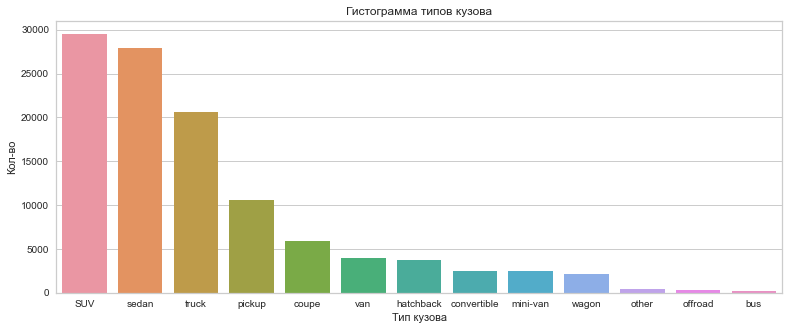

In [48]:
# Создание столбчатой диаграммы распределения типов
plt.figure(figsize=(13, 5))
sns.barplot(x=df_drop['type'].value_counts().index, 
            y=df_drop['type'].value_counts().values)
plt.xlabel('Тип кузова')
plt.ylabel('Кол-во')
plt.title('Гистограмма типов кузова')
plt.show()

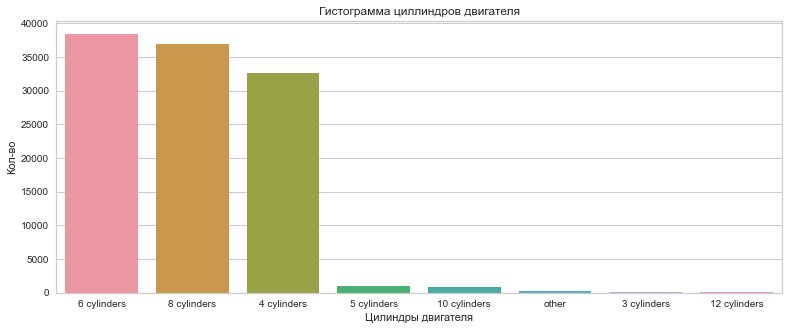

In [49]:
plt.figure(figsize=(13, 5))
sns.barplot(x=df_drop['cylinders'].value_counts().index, 
            y=df_drop['cylinders'].value_counts().values)
plt.xlabel('Цилиндры двигателя')
plt.ylabel('Кол-во')
plt.title('Гистограмма циллиндров двигателя')
plt.show()

Удаляю те автомобили, у которых размер, тип кузова очень редкие (их нельзя объединить в остальное, так как от того, автобус или минивэн продается - очень зависит цена, что нельзя скзаать про цвет, о котором чуть ниже)

In [50]:
df_filtered_1 = df_drop[(df_drop['size'] != 'sub-compact') &
                    (df_drop['type'] != 'coupe') & (df_drop['type'] != 'van') &
                    (df_drop['type'] != 'hatchback') & (df_drop['type'] != 'convertible') &
                    (df_drop['type'] != 'mini-van') & (df_drop['type'] != 'wagon') & 
                    (df_drop['type'] != 'other') & (df_drop['type'] != 'offroad') & 
                    (df_drop['type'] != 'bus') & (df_drop['cylinders'] != 'other')]

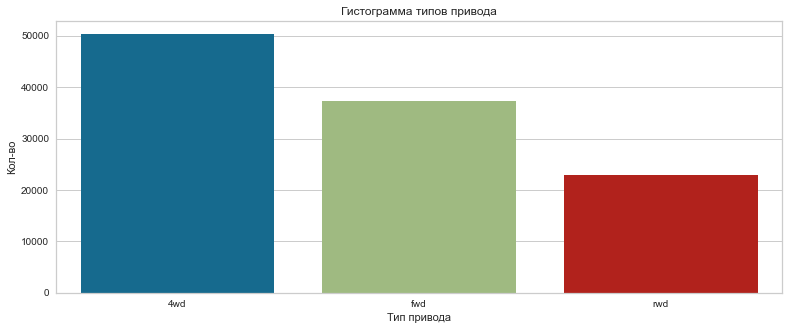

In [51]:
plt.figure(figsize=(13, 5))
sns.barplot(x=df_drop['drive'].value_counts().index, 
            y=df_drop['drive'].value_counts().values)
plt.xlabel('Тип привода')
plt.ylabel('Кол-во')
plt.title('Гистограмма типов привода')
plt.show()

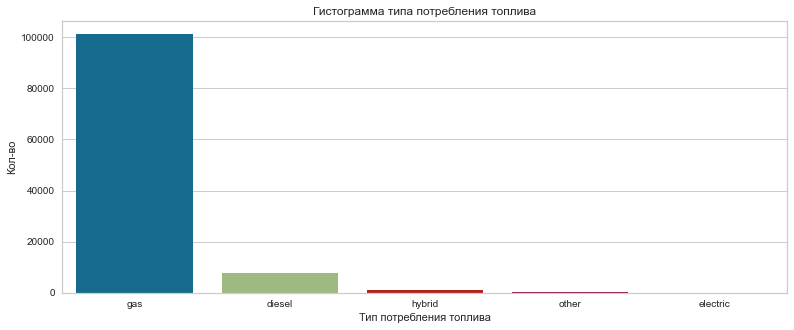

In [52]:
plt.figure(figsize=(13, 5))
sns.barplot(x=df_drop['fuel'].value_counts().index, 
            y=df_drop['fuel'].value_counts().values)
plt.xlabel('Тип потребления топлива')
plt.ylabel('Кол-во')
plt.title('Гистограмма типа потребления топлива')
plt.show()

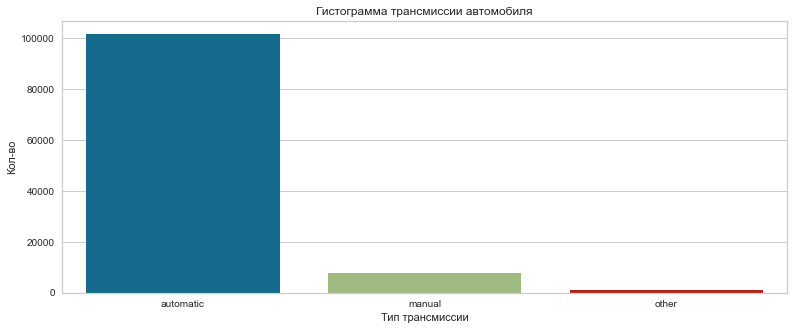

In [53]:
plt.figure(figsize=(13, 5))
sns.barplot(x=df_drop['transmission'].value_counts().index, 
            y=df_drop['transmission'].value_counts().values)
plt.xlabel('Тип трансмиссии')
plt.ylabel('Кол-во')
plt.title('Гистограмма трансмиссии автомобиля')
plt.show()

бинаризация трансмисии на автоматическую и остальные, добавлени столбца с Целым кол-вом циллиндров двигателя, бинаризация типа топлива на газ и остальные

In [54]:
df_filtered_2 = df_filtered_1.copy()
df_filtered_2.loc[:, 'transmission_automatic'] = df_filtered_1['transmission'].apply(lambda x: 1 if x == 'automatic' else 0)
df_filtered_2.loc[:, 'int_cylinders'] = df_filtered_1['cylinders'].apply(lambda x: int(x.split(' ')[0]))
df_filtered_2.loc[:, 'fuel_gas'] = df_filtered_1['fuel'].apply(lambda x: 1 if x == 'gas' else 0)
df_filtered_3 = df_filtered_2.drop(columns = ['transmission', 'fuel', 'cylinders'])

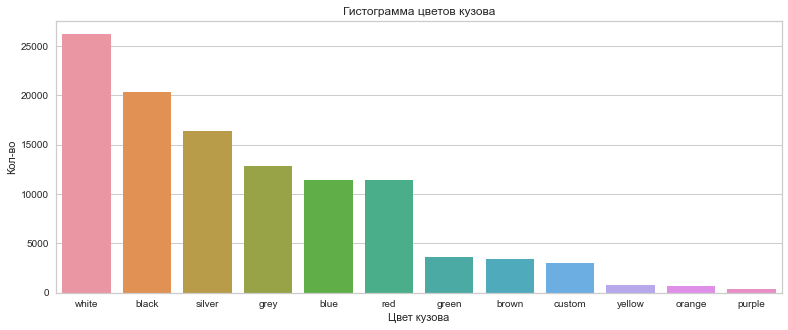

In [55]:
plt.figure(figsize=(13, 5))
sns.barplot(x=df_drop['paint_color'].value_counts().index, 
            y=df_drop['paint_color'].value_counts().values)
plt.xlabel('Цвет кузова')
plt.ylabel('Кол-во')
plt.title('Гистограмма цветов кузова')
plt.show()

объединяю редкие цвета в "другое"

In [56]:
# Список редких цветов
rare_colors = ['green', 'brown', 'custom', 'yellow', 'orange', 'purple']

# Функция для замены редких цветов на "other color"
def replace_rare_colors(color):
    if color in rare_colors:
        return 'other color'
    else:
        return color

df_filtered_3.loc[:, 'paint_color'] = df_filtered_3['paint_color'].apply(replace_rare_colors)

In [57]:
df_filtered_3.head(2)

,price,year,manufacturer,condition,odometer,drive,size,type,paint_color,transmission_automatic,int_cylinders,fuel_gas
7,7995,2007.0,lexus,excellent,146111.0,fwd,compact,sedan,white,1,6,1
8,4995,2011.0,hyundai,excellent,115048.0,fwd,compact,sedan,blue,1,4,1


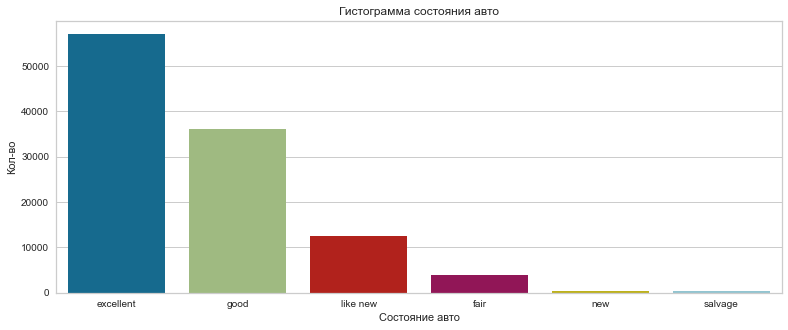

In [58]:
plt.figure(figsize=(13, 5))
sns.barplot(x=df_drop['condition'].value_counts().index, 
            y=df_drop['condition'].value_counts().values)
plt.xlabel('Состояние авто')
plt.ylabel('Кол-во')
plt.title('Гистограмма состояния авто')
plt.show()

объединим в один класс "like new" и "new", так как new очень мало, а значение очень близко

In [59]:
df_filtered_3.loc[df_filtered_3['condition'] == 'new', 'condition'] = 'like new'

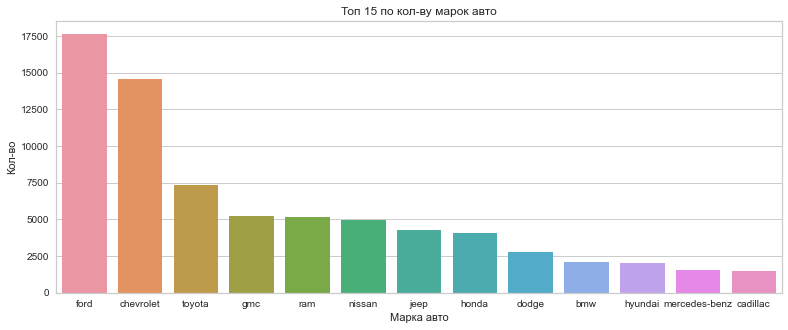

In [60]:
plt.figure(figsize=(13, 5))
sns.barplot(x=df_filtered_3['manufacturer'].value_counts()[:13].index, 
            y=df_filtered_3['manufacturer'].value_counts()[:13].values)
plt.xlabel('Марка авто')
plt.ylabel('Кол-во')
plt.title('Топ 15 по кол-ву марок авто')
plt.show()

In [61]:
df_filtered_3

,price,year,manufacturer,condition,odometer,drive,size,type,paint_color,transmission_automatic,int_cylinders,fuel_gas
7,7995,2007.0,lexus,excellent,146111.0,fwd,compact,sedan,white,1,6,1
8,4995,2011.0,hyundai,excellent,115048.0,fwd,compact,sedan,blue,1,4,1
12,8000,2010.0,audi,good,150000.0,4wd,full-size,sedan,grey,1,6,1
18,6995,2011.0,chevrolet,excellent,102000.0,fwd,full-size,sedan,blue,1,6,1
24,8900,2012.0,ram,good,112000.0,rwd,full-size,pickup,white,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
525820,5500,1999.0,chevrolet,fair,76000.0,4wd,full-size,truck,red,1,8,0
525824,2495,2007.0,ford,excellent,170000.0,fwd,full-size,sedan,red,1,6,1
525829,3850,2005.0,ford,excellent,103000.0,fwd,compact,sedan,other color,1,4,1
525835,6500,2012.0,nissan,good,99950.0,4wd,mid-size,SUV,white,1,4,1


из года вычитаем 1900

In [62]:
df_filtered_3['year'] = (df_filtered_3['year']-1900).astype(int)
df_filtered_3['odometer'] = df_filtered_3['odometer'].astype(int)

In [63]:
df_filtered_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87923 entries, 7 to 525836
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   price                   87923 non-null  int64 
 1   year                    87923 non-null  int32 
 2   manufacturer            87923 non-null  object
 3   condition               87923 non-null  object
 4   odometer                87923 non-null  int32 
 5   drive                   87923 non-null  object
 6   size                    87923 non-null  object
 7   type                    87923 non-null  object
 8   paint_color             87923 non-null  object
 9   transmission_automatic  87923 non-null  int64 
 10  int_cylinders           87923 non-null  int64 
 11  fuel_gas                87923 non-null  int64 
dtypes: int32(2), int64(4), object(6)
memory usage: 8.0+ MB


присутствуют строки с ценой равной 0 и 1, поэтому обрезаем цену снизу и сверху

удаляем выбросы, манипулируем с данными о пробеге(делим нацело на 1000)

In [64]:
df_filtered_4 = df_filtered_3[df_filtered_3['price'] > 1000]
df_filtered_4 = df_filtered_4[df_filtered_4['price'] < 40000]
df_filtered_4['odometer'] = df_filtered_4['odometer'] // 1000
df_filtered_4 = df_filtered_4[df_filtered_4['year'] > 110]

In [65]:
df_filtered_4.head()

,price,year,manufacturer,condition,odometer,drive,size,type,paint_color,transmission_automatic,int_cylinders,fuel_gas
8,4995,111,hyundai,excellent,115,fwd,compact,sedan,blue,1,4,1
18,6995,111,chevrolet,excellent,102,fwd,full-size,sedan,blue,1,6,1
24,8900,112,ram,good,112,rwd,full-size,pickup,white,1,8,1
28,9995,111,subaru,excellent,113,4wd,compact,SUV,other color,1,4,1
35,6995,114,dodge,good,116,fwd,mid-size,sedan,silver,1,4,1


One-hot encoding

In [66]:
# Список столбцов для one-hot encoding
columns_to_encode = ['manufacturer', 'condition', 'drive', 'size', 'type', 'paint_color']
df_encoded = pd.get_dummies(df_filtered_4, columns=columns_to_encode, drop_first= True)
df_encoded

,price,year,odometer,transmission_automatic,int_cylinders,fuel_gas,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,size_mid-size,type_pickup,type_sedan,type_truck,paint_color_blue,paint_color_grey,paint_color_other color,paint_color_red,paint_color_silver,paint_color_white
8,4995,111,115,1,4,1,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
18,6995,111,102,1,6,1,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
24,8900,112,112,1,8,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
28,9995,111,113,1,4,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
35,6995,114,116,1,4,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525714,6999,112,123,1,4,1,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
525718,33900,116,75,1,6,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
525729,8500,116,87,1,4,1,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
525732,13599,115,45,1,6,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Матрица корреляционная

In [70]:
correlation_matrix = df_encoded.corr()
np.fill_diagonal(correlation_matrix.values, 0)
filtered_correlation_matrix = correlation_matrix[(correlation_matrix.abs() > 0.85).any(axis=1)]
# plt.figure(figsize=(15, 4))
# sns.heatmap(filtered_correlation_matrix, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()
filtered_correlation_matrix.shape

(0, 58)

#### размер корреляционной матрицы 0, значит нет корреляции между признаками (отсутствует мультиколлинеарность)

Разделение на тест и трейн, масштабирование данных

In [35]:
df_encoded

,price,year,odometer,transmission_automatic,int_cylinders,fuel_gas,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,size_mid-size,type_pickup,type_sedan,type_truck,paint_color_blue,paint_color_grey,paint_color_other color,paint_color_red,paint_color_silver,paint_color_white
8,4995,111,115,1,4,1,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
18,6995,111,102,1,6,1,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
24,8900,112,112,1,8,1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
28,9995,111,113,1,4,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
35,6995,114,116,1,4,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525714,6999,112,123,1,4,1,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
525718,33900,116,75,1,6,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
525729,8500,116,87,1,4,1,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
525732,13599,115,45,1,6,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36522 entries, 8 to 525835
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   price                         36522 non-null  int64
 1   year                          36522 non-null  int32
 2   odometer                      36522 non-null  int32
 3   transmission_automatic        36522 non-null  int64
 4   int_cylinders                 36522 non-null  int64
 5   fuel_gas                      36522 non-null  int64
 6   manufacturer_alfa-romeo       36522 non-null  bool 
 7   manufacturer_audi             36522 non-null  bool 
 8   manufacturer_bmw              36522 non-null  bool 
 9   manufacturer_buick            36522 non-null  bool 
 10  manufacturer_cadillac         36522 non-null  bool 
 11  manufacturer_chevrolet        36522 non-null  bool 
 12  manufacturer_chrysler         36522 non-null  bool 
 13  manufacturer_dodge            36522

In [71]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
# Масштабирование обучающих данных
X_train.loc[:, ['year', 'odometer']] = scaler.fit_transform(X_train.loc[:, ['year', 'odometer']])
# Применение обученного скалера к тестовым данным
X_test.loc[:, ['year', 'odometer']] = scaler.transform(X_test.loc[:, ['year', 'odometer']])

print("Обучающая выборка экзогенных переменных после масштабирования:")
X_train.head()

Обучающая выборка экзогенных переменных после масштабирования:


,year,odometer,transmission_automatic,int_cylinders,fuel_gas,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,size_mid-size,type_pickup,type_sedan,type_truck,paint_color_blue,paint_color_grey,paint_color_other color,paint_color_red,paint_color_silver,paint_color_white
468628,0.111111,0.000000,1,4,1,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
365209,0.555556,0.015401,1,8,0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
519800,0.555556,0.002781,1,4,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
267461,0.444444,0.008021,1,4,1,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
451353,0.222222,0.003102,1,4,1,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [72]:
print("Тестовая выборка экзогенных переменных после масштабирования:")
X_test.head()

Тестовая выборка экзогенных переменных после масштабирования:


,year,odometer,transmission_automatic,int_cylinders,fuel_gas,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,size_mid-size,type_pickup,type_sedan,type_truck,paint_color_blue,paint_color_grey,paint_color_other color,paint_color_red,paint_color_silver,paint_color_white
176554,0.111111,0.013690,1,8,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2522,0.333333,0.003102,1,4,1,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False
69121,0.111111,0.006952,1,4,1,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
393340,0.222222,0.011551,1,4,1,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
382364,0.555556,0.008342,1,4,1,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [73]:
y_train.describe()

count    29217.000000
mean     17161.865934
std       8853.684912
min       1025.000000
25%       9995.000000
50%      15639.000000
75%      23000.000000
max      39999.000000
Name: price, dtype: float64

## 3 Метрики

Коэффициент детерминации (R² Score)    
- Показывает количество отклонений в прогнозах, объясненных набором данных. Если R² = 0.85, это означает, что модель объясняет 85% вариации цены автомобилей.   
- Для бизнеса это указывает на высокую точность модели: 85% изменений в цене автомобилей можно предсказать с учетом входных данных.   

Корень из среднеквадратичной ошибки (RMSE)    
- Если RMSE = 100, это означает, что средняя ошибка составляет 100 долларов.    
- Для бизнеса RMSE = 100 долларов может означать, что при оценке автомобилей модель в среднем допускает ошибки такого размера.

Средняя абсолютная процентная ошибка (MAPE)   
- MAPE измеряет средний абсолютный процент ошибки между предсказанными и фактическими значениями. Если MAPE = 5%, это означает, что в среднем предсказания модели отличаются от фактической цены автомобиля на 5%.   
- Для бизнеса это означает, что модель предсказывает цены автомобилей с ошибкой в 5%, что позволяет оценить точность модели в относительном выражении.   

## 4 модели машинного обучения 

Линейная регрессия

In [74]:
model_LR = LinearRegression().fit(X_train, y_train)
y_model_LR_pred = model_LR.predict(X_test)

print(f"R^2: {r2_score(y_test, y_model_LR_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_model_LR_pred, squared=False):.1f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_model_LR_pred):.2f}")

R^2: 0.71
RMSE: 4715.1
MAPE: 0.29


метод К ближайших соседей

In [75]:
#pip install threadpoolctl==3.1.0

In [76]:
model_KNR = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_model_KNR_pred = model_KNR.predict(X_test)

In [77]:
print(f"R^2: {r2_score(y_test, y_model_KNR_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_model_KNR_pred, squared=False):.1f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_model_KNR_pred):.2f}")

R^2: 0.75
RMSE: 4374.0
MAPE: 0.25


Метод решающих деревьев

In [78]:
model_DT = DecisionTreeRegressor(random_state=52).fit(X_train, y_train)
y_model_DT_pred = model_DT.predict(X_test)

In [79]:
print(f"R^2: {r2_score(y_test, y_model_DT_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_model_DT_pred, squared=False):.1f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_model_DT_pred):.2f}")

R^2: 0.80
RMSE: 3888.2
MAPE: 0.18


Перцептрон

In [80]:
model_MLP = MLPRegressor(random_state=52, max_iter=300).fit(X_train, y_train)
y_model_MLP_pred = model_MLP.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
print(f"R^2: {r2_score(y_test, y_model_MLP_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_model_MLP_pred, squared=False):.1f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_model_MLP_pred):.2f}")

R^2: 0.71
RMSE: 4710.4
MAPE: 0.30


Лучше всех справился Метод решающих деревьев
с результатами:      
R^2: 0.80   
RMSE: 3888.2   
MAPE: 0.18     

## 5 диагностика лучшей модели

Кривая обучения

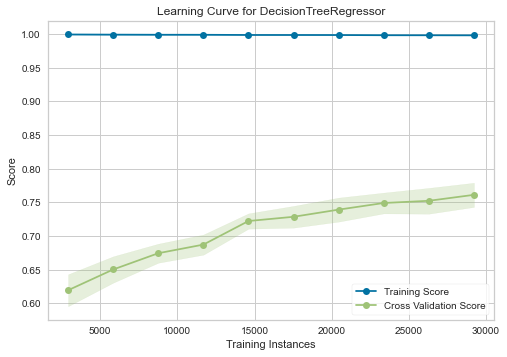

In [85]:
visualizer = LearningCurve(
    DecisionTreeRegressor(), train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2'
).fit(X, y).show()

С увеличением объема тренировочной выборки скор растет тестовой (с кросс валидацией) выборки растет

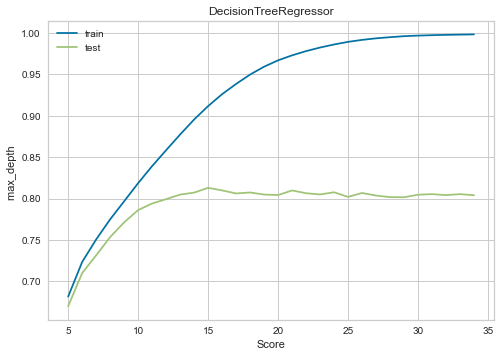

In [101]:
trains = []
tests = []
for i in range(5,35):
    DT = DecisionTreeRegressor(max_depth=int(i)).fit(X_train, y_train)
    trains.append(DT.score(X_train, y_train))
    tests.append(DT.score(X_test, y_test))

plt.plot(range(5,35), trains, label="train")
plt.plot(range(5,35), tests, label="test")
plt.title('DecisionTreeRegressor')
plt.xlabel('Score')
plt.ylabel('max_depth ')
plt.legend()
plt.show()

In [99]:
range(5,35)[np.argmax(tests)]

17

на графике выдино, что после 17 шага тестовый скор начинает уменьшаться, модель начинает переобучаться, что свойственно дереву решений при больших глубинах

## 6 подбора оптимальных гиперпараметров для модели DecisionTreeRegressor

In [104]:
model_DT = DecisionTreeRegressor()

# Сетка гиперпараметров для подбора
param_grid = {
    'max_depth': [3, 10, 15, 16, 17, 18, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Поиск по сетке с кросс-валидацией
grid_search = GridSearchCV(estimator=model_DT, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Вывод наилучших гиперпараметров
print("Наилучшие гиперпараметры:", grid_search.best_params_)

Наилучшие гиперпараметры: {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [105]:
best_params = grid_search.best_params_
optimal_model_DT = DecisionTreeRegressor(max_depth=best_params['max_depth'], 
                                         min_samples_split=best_params['min_samples_split'], 
                                         min_samples_leaf=best_params['min_samples_leaf'])
optimal_model_DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, min_samples_leaf=2, min_samples_split=10)

In [107]:
y_pred = optimal_model_DT.predict(X_test)

In [108]:
print(f"R^2: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.1f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}")

R^2: 0.82
RMSE: 3703.6
MAPE: 0.20


Было:    
R^2: 0.80   
RMSE: 3888.2   
MAPE: 0.18   

## 7 Постройте ансамблевую модель машинного обучения.


AdaBoost (Adaptive Boosting): AdaBoost обучает последовательность слабых учеников и на каждом шаге сосредотачивается на ошибках предыдущих моделей, увеличивая веса неправильно классифицированных точек данных. Таким образом, каждый новый ученик фокусируется на исправлении ошибок предыдущих учеников.

In [109]:
model_AdaBoost = AdaBoostRegressor(base_estimator=optimal_model_DT,
                                   n_estimators=50, learning_rate=1.0, 
                                   random_state=52)

model_AdaBoost.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=17,
                                                       min_samples_leaf=2,
                                                       min_samples_split=10),
                  random_state=52)

количество учеников в ансамбле (n_estimators) равным 50, и коэффициент обучения (learning_rate) равным 1.0

In [111]:
y_pred_AdaBoost = model_AdaBoost.predict(X_test)

In [112]:
print(f"R^2: {r2_score(y_test, y_pred_AdaBoost):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_AdaBoost, squared=False):.1f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_AdaBoost):.2f}")

R^2: 0.87
RMSE: 3169.2
MAPE: 0.19


Ансамбливая модель показала лучший результат 

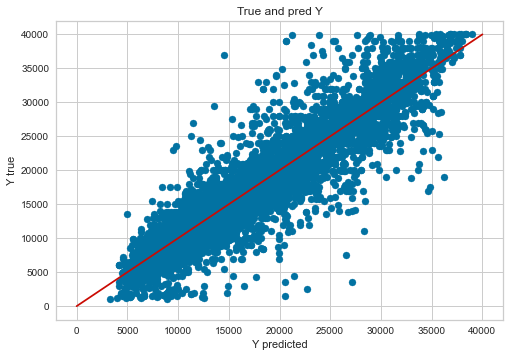

In [128]:
plt.scatter(y_pred_AdaBoost, np.array(y_test))
plt.plot([0,40000], [0, 40000], 'r')
plt.title('True and pred Y')
plt.xlabel('Y predicted')
plt.ylabel('Y true')
plt.show()

Выводы.   
   - Рынок подержанных автомобилей представляет собой сложную и динамичную область, где ценообразование зависит от множества факторов. Анализ влияния различных характеристик, таких как марка, тип кузова и год выпуска, на цену подержанных автомобилей позволяет лучше понять динамику этого рынка. 
   - Важным выводом является необходимость учета не только видимых характеристик, но и факторов, таких как бюджет разработки, рекламные затраты, и другие, которые могут оказывать влияние на формирование цен на подержанные автомобили.   
   - В целом, математическая модель, учитывающая сложные факторы, влияющие на стоимость подержанных автомобилей, может стать полезным инструментом для различных участников рынка, помогая им принимать более информированные решения в этой динамичной сфере (например, помогать при выборе б/у авто, или автосалонам при выборе цены авто).   